In [13]:
import numpy as np
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv(r"C:\Users\Denyse\Downloads\housing.csv", delim_whitespace=True)

print(df.head())

   0.00632  18.00  2.310  0  0.5380  6.5750  65.20  4.0900  1  296.0  15.30  \
0  0.02731    0.0   7.07  0   0.469   6.421   78.9  4.9671  2  242.0   17.8   
1  0.02729    0.0   7.07  0   0.469   7.185   61.1  4.9671  2  242.0   17.8   
2  0.03237    0.0   2.18  0   0.458   6.998   45.8  6.0622  3  222.0   18.7   
3  0.06905    0.0   2.18  0   0.458   7.147   54.2  6.0622  3  222.0   18.7   
4  0.02985    0.0   2.18  0   0.458   6.430   58.7  6.0622  3  222.0   18.7   

   396.90  4.98  24.00  
0  396.90  9.14   21.6  
1  392.83  4.03   34.7  
2  394.63  2.94   33.4  
3  396.90  5.33   36.2  
4  394.12  5.21   28.7  


In [14]:
df.isnull().sum()

0.00632    0
18.00      0
2.310      0
0          0
0.5380     0
6.5750     0
65.20      0
4.0900     0
1          0
296.0      0
15.30      0
396.90     0
4.98       0
24.00      0
dtype: int64

In [15]:
df = pd.read_csv(r"C:\Users\Denyse\Downloads\housing.csv", delim_whitespace=True, header=None)

# Assign column names (example for 14 columns in the Boston housing dataset)
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [16]:
print(df.head())
print(df.info())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-nu

In [17]:
X = df.drop('MEDV', axis=1) #features
y = df['MEDV'] # target


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [21]:
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 3.189091965887846
MSE: 24.291119474973495
R2 Score: 0.6687594935356322


In [22]:

# Initialize the Support Vector Regression (SVR) model with a linear kernel
svr_model = SVR(kernel='linear')
# Train the model
svr_model.fit(X_train, y_train)

# Predict on the test data
y_pred_svr = svr_model.predict(X_test)
# Evaluate the model's performance
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Print the evaluation metrics
print("SVR Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_svr}")
print(f"Mean Squared Error (MSE): {mse_svr}")
print(f"R-squared Score (R2): {r2_svr}")

SVR Model Performance:
Mean Absolute Error (MAE): 3.1035741489511923
Mean Squared Error (MSE): 28.91852267161814
R-squared Score (R2): 0.6056589279132618


In [23]:
# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 Score): {r2}")


Model Evaluation:
Mean Absolute Error (MAE): 2.041078431372549
Mean Squared Error (MSE): 7.912745333333333
R-squared (R2 Score): 0.8920995891343227


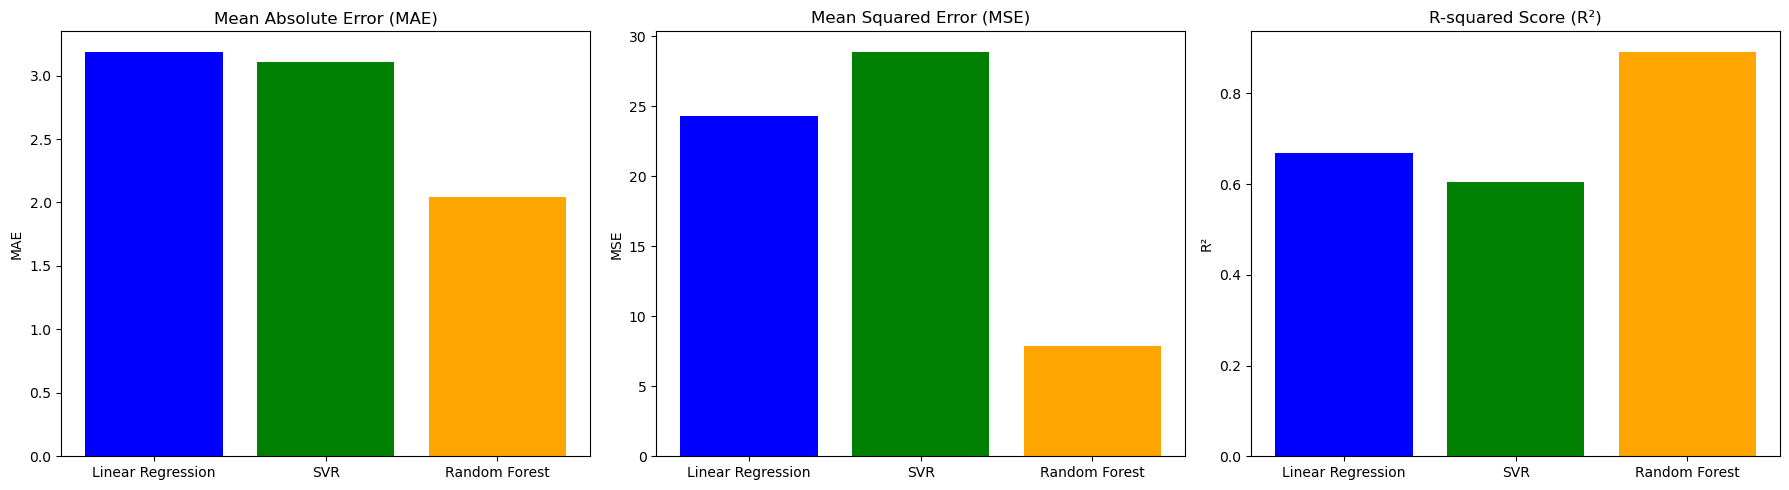

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the models
models = ['Linear Regression', 'SVR', 'Random Forest']
mae = [3.189091965887852, 3.1035741489511923, 2.041078431372549]
mse = [24.291119474973613, 28.91852267161814, 7.912745333333333]
r2 = [0.6687594935356307, 0.6056589279132618, 0.8920995891343227]

# Plotting MAE, MSE, and R2 for all models
x = np.arange(len(models))  # The label locations

fig, ax = plt.subplots(1, 3, figsize=(18, 5))  # Create a subplot for each metric

# MAE Plot
ax[0].bar(x, mae, color=['blue', 'green', 'orange'])
ax[0].set_title('Mean Absolute Error (MAE)')
ax[0].set_xticks(x)
ax[0].set_xticklabels(models)
ax[0].set_ylabel('MAE')

# MSE Plot
ax[1].bar(x, mse, color=['blue', 'green', 'orange'])
ax[1].set_title('Mean Squared Error (MSE)')
ax[1].set_xticks(x)
ax[1].set_xticklabels(models)
ax[1].set_ylabel('MSE')

# R² Plot
ax[2].bar(x, r2, color=['blue', 'green', 'orange'])
ax[2].set_title('R-squared Score (R²)')
ax[2].set_xticks(x)
ax[2].set_xticklabels(models)
ax[2].set_ylabel('R²')

# Adjust layout
plt.tight_layout()
plt.show()


FINDINGS: Random Forest's lower MAE and MSE indicate better accuracy and fewer large errors, while its higher R² demonstrates a better fit to the data. These reasons collectively make Random Forest the best model for this dataset.